In [1]:
# define and fit a discriminator model
from numpy import zeros
from numpy import ones
from numpy import hstack
from numpy.random import rand
from numpy.random import randn
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tqdm import tqdm

In [2]:
# simple x^2 function
def calculate(x):
    return x * x

In [3]:
# demonstrate simple x^2 function
from matplotlib import pyplot

# define inputs
inputs = [-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5]
# calculate outputs
outputs = [calculate(x) for x in inputs]
# plot the result
pyplot.plot(inputs, outputs)
#pyplot.show()

In [4]:
# generate randoms sample from x^2
def generate_samples(n=100):
    # generate random inputs in [-0.5, 0.5]
    X1 = rand(n) - 0.5
    # generate outputs X^2 (quadratic)
    X2 = X1 * X1
    # stack arrays
    X1 = X1.reshape(n, 1)
    X2 = X2.reshape(n, 1)
    return hstack((X1, X2))

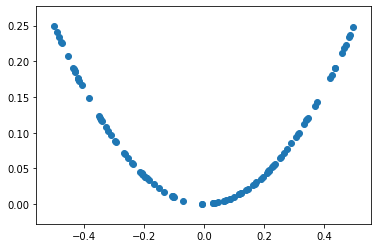

In [5]:
# generate samples
data = generate_samples()
# plot samples
pyplot.scatter(data[:, 0], data[:, 1])


In [6]:
# define the discriminator model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
 
# define the standalone discriminator model
def define_discriminator(n_inputs=2):
    model = Sequential()
    model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                75        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


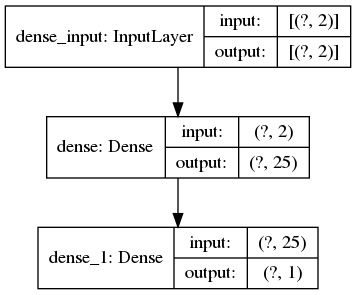

In [7]:
 
# define the discriminator model
model = define_discriminator()
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

In [8]:
def generate_real_samples(n):
    # generate inputs in [-0.5, 0.5]
    X1 = rand(n) - 0.5
    # generate outputs X^2
    X2 = X1 * X1
    # stack arrays
    X1 = X1.reshape(n, 1)
    X2 = X2.reshape(n, 1)
    X = hstack((X1, X2))
    # generate class labels
    y = ones((n, 1))
    return X, y

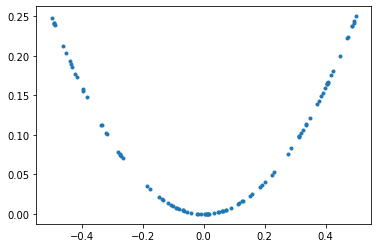

In [9]:
X, y = generate_real_samples(100)
pyplot.plot(X[:,0], X[:,1],'.')

In [10]:
np.unique(y)

array([1.])

In [11]:
# generate n fake samples with class labels
def generate_fake_samples(n):
    # generate inputs in [-1, 1]
    X1 = -1 + rand(n) * 2
    # generate outputs in [-1, 1]
    X2 = -1 + rand(n) * 2
    # stack arrays
    X1 = X1.reshape(n, 1)
    X2 = X2.reshape(n, 1)
    X = hstack((X1, X2))
    
    # generate class labels
    y = zeros((n, 1))
    return X, y

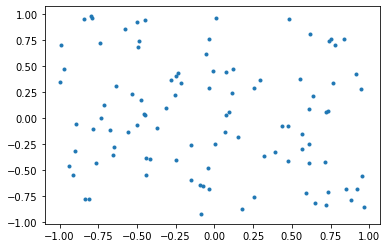

In [12]:
X, y = generate_fake_samples(100)
pyplot.plot(X[:,0], X[:,1],'.')

In [13]:
# train the discriminator model
def train_discriminator(model, n_epochs=1000, n_batch=128):
    half_batch = int(n_batch / 2)
    vacc_real =[]
    vacc_fake =[]
    # run epochs manually
    for i in range(n_epochs):
        # generate real examples
        X_real, y_real = generate_real_samples(half_batch)
        # update model
        model.train_on_batch(X_real, y_real)
        # generate fake examples
        X_fake, y_fake = generate_fake_samples(half_batch)
        # update model
        model.train_on_batch(X_fake, y_fake)
        # evaluate the model
        _, acc_real = model.evaluate(X_real, y_real, verbose=0)
        _, acc_fake = model.evaluate(X_fake, y_fake, verbose=0)
        
        vacc_real.append(acc_real)
        vacc_fake.append(acc_fake)
        if i % 100 ==0 :
            print(i, acc_real, acc_fake)
        
    return vacc_real, vacc_fake

### Training the discriminator model on real and fake examples.

In [14]:
vacc_real, vacc_fake = train_discriminator(model)

0 0.734375 0.421875
10 0.734375 0.515625
20 0.625 0.4375
30 0.671875 0.359375
40 0.390625 0.421875
50 0.3125 0.46875
60 0.328125 0.515625
70 0.328125 0.359375
80 0.3125 0.453125
90 0.15625 0.515625
100 0.21875 0.5
110 0.171875 0.5
120 0.234375 0.625
130 0.28125 0.78125
140 0.296875 0.765625
150 0.3125 0.71875
160 0.375 0.78125
170 0.34375 0.890625
180 0.265625 0.984375
190 0.3125 1.0
200 0.421875 0.984375
210 0.359375 0.984375
220 0.421875 1.0
230 0.453125 0.9375
240 0.484375 0.953125
250 0.421875 0.984375
260 0.484375 0.984375
270 0.5625 0.953125
280 0.515625 0.953125
290 0.703125 0.984375
300 0.53125 0.984375
310 0.671875 0.96875
320 0.6875 0.921875
330 0.640625 0.921875
340 0.8125 0.921875
350 0.71875 0.953125
360 0.609375 0.96875
370 0.75 0.9375
380 0.703125 0.875
390 0.765625 0.90625
400 0.84375 0.921875
410 0.90625 0.921875
420 0.875 0.953125
430 0.875 0.9375
440 0.84375 0.90625
450 0.890625 0.90625
460 0.96875 0.890625
470 0.890625 0.9375
480 0.953125 0.875
490 0.890625 0.875
50

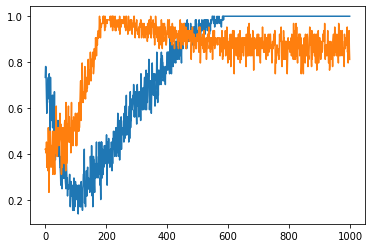

In [15]:
pyplot.plot(vacc_real)
pyplot.plot(vacc_fake)

Define a Generator Model

In [16]:
# define the generator model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
 
# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
    model = Sequential()
    model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
    model.add(Dense(n_outputs, activation='linear'))
    return model
 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 15)                90        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 32        
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


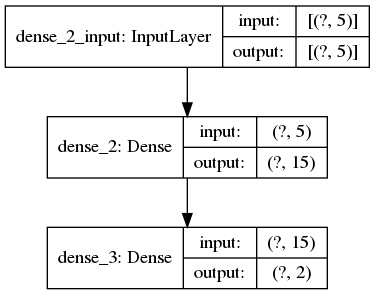

In [17]:
# define the discriminator model
model = define_generator(5)
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

In [18]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
    # generate points in the latent space
    x_input = randn(latent_dim * n)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n, latent_dim)
    return x_input

# use the generator to generate n fake examples and plot the results

def generate_fake_samples(generator, latent_dim, n, verbose=False):
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, n)
    # predict outputs
    X = generator.predict(x_input)
    # create class labels
    y = zeros((n, 1))
    
    # plot the results
    if verbose:
        pyplot.scatter(X[:, 0], X[:, 1])
        pyplot.show()
    
    
    return X, y    

In [19]:
# generate points in the latent space
generate_latent_points(latent_dim=5, n=10)

array([[-0.36077036,  0.70656279,  1.27358773,  1.08299112,  0.39975274],
       [ 0.73514105,  2.32602872, -0.63621593,  1.55491116, -0.41371757],
       [ 0.25582578, -0.01244094,  0.39310527,  0.16002793,  1.2946502 ],
       [-0.54470725, -0.9043164 , -0.88618555, -0.6256443 , -1.18014213],
       [-0.55172036,  0.14152173,  0.0311214 ,  0.54200168,  0.48482246],
       [ 0.59212403,  0.10470073, -1.61037084,  0.9128431 , -0.74227423],
       [ 2.22335716,  1.59839846, -0.68850887, -1.5481454 ,  1.33379951],
       [-0.09029151, -0.63421744,  0.28787736,  0.01128395,  0.12939563],
       [-0.14882913,  0.48721049, -1.01103554,  0.16706627,  0.47414343],
       [ 0.38762536, -0.05419387,  0.32485961,  0.06715644,  0.61524647]])

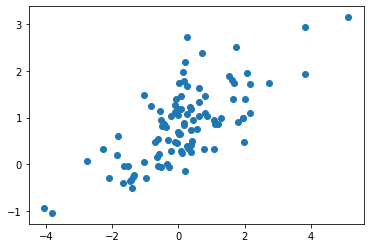

In [20]:
# size of the latent space
latent_dim = 5
# define the discriminator model
model = define_generator(latent_dim)

# generate and plot generated samples
_,_  = generate_fake_samples(model, latent_dim, 100, True)

### Training the Generator Model

The weights in the generator model are updated based on the performance of the discriminator model.

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

# define the standalone discriminator model
def define_discriminator(n_inputs=2):
    model = Sequential()
    model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
    model = Sequential()
    model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
    model.add(Dense(n_outputs, activation='linear'))
    return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    # connect them
    model = Sequential()
    # add generator
    model.add(generator)
    # add the discriminator
    model.add(discriminator)
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 2)                 122       
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 101       
Total params: 223
Trainable params: 122
Non-trainable params: 101
_________________________________________________________________


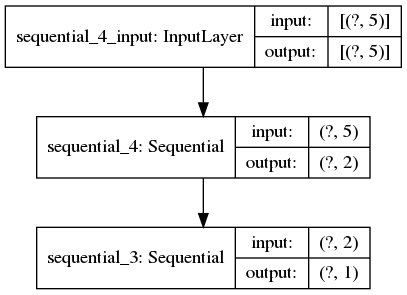

In [22]:
# size of the latent space
latent_dim = 5
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# summarize gan model
gan_model.summary()
# plot gan model
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

In [23]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128):
    # determine half the size of one batch, for updating the discriminator
    half_batch = int(n_batch / 2)
    # manually enumerate epochs
    for i in tqdm(range(n_epochs)):
        # prepare real samples
        x_real, y_real = generate_real_samples(half_batch)
        # prepare fake examples
        x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
        # update discriminatorc
        d_model.train_on_batch(x_real, y_real)
        d_model.train_on_batch(x_fake, y_fake)
        
        
        # prepare points in latent space as input for the generator
        x_gan = generate_latent_points(latent_dim, n_batch)
        # create inverted labels for the fake samples
        y_gan = ones((n_batch, 1))
        # update the generator via the discriminator's error
        # weights in the discriminator not trainable 
        gan_model.train_on_batch(x_gan, y_gan)

In [24]:
# size of the latent space
latent_dim = 5

# create the generator
generator = define_generator(latent_dim)

# create the discriminator
discriminator = define_discriminator()

# create the gan
# weights in the discriminator not trainable
gan_model = define_gan(generator, discriminator)

# train model
n_epochs = 10000
train(generator, discriminator, gan_model, latent_dim, n_epochs)

100%|██████████| 10000/10000 [09:34<00:00, 17.39it/s]


In [25]:
# evaluate the discriminator and plot real and fake points
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
    # prepare real samples
    x_real, y_real = generate_real_samples(n)
    # evaluate discriminator on real examples
    _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
    # prepare fake examples
    x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
    # evaluate discriminator on fake examples
    _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
    
    # summarize discriminator performance
    print(epoch, acc_real, acc_fake)
    # scatter plot real and fake data points
    pyplot.scatter(x_real[:, 0], x_real[:, 1], color='red')
    pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
    pyplot.show()

10000 0.7799999713897705 0.6700000166893005


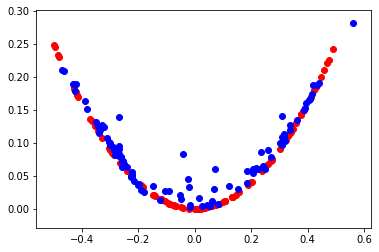

In [26]:
summarize_performance(n_epochs, generator, discriminator, latent_dim, 100)

https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-a-1-dimensional-function-from-scratch-in-keras/